In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [16]:
with gzip.open("hists_quantile_qcd_finern2_withmsd.pkl.gz") as fin:
    hists = pickle.load(fin)

In [17]:
with gzip.open("hists_quantile_hbb_finern2_withmsd.pkl.gz") as fin2:
    hists2 = pickle.load(fin2)

In [18]:
print(hists)
print(hists2)

{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_msd,AK8Puppijet0_pt,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc35c45ed30>}
{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_msd,AK8Puppijet0_pt,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc35c45e8d0>}


In [19]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    hists2[key] = hists2[key].group(process, process_cats, process_map)

In [20]:
x = hists['hjetpt']
x2 = hists2['hjetpt']

In [21]:
print(x.axis("AK8Puppijet0_pt").identifiers(overflow='allnan'))
print(x2)

[<Interval ((-inf, 400)) instance at 0x7fc35c4504e0>, <Interval ([400, 410)) instance at 0x7fc35c450630>, <Interval ([410, 420)) instance at 0x7fc35c450668>, <Interval ([420, 430)) instance at 0x7fc35c4505f8>, <Interval ([430, 440)) instance at 0x7fc35c4506a0>, <Interval ([440, 450)) instance at 0x7fc35c4507b8>, <Interval ([450, 460)) instance at 0x7fc35c4507f0>, <Interval ([460, 470)) instance at 0x7fc35c4506d8>, <Interval ([470, 480)) instance at 0x7fc35c450748>, <Interval ([480, 490)) instance at 0x7fc35c450780>, <Interval ([490, 500)) instance at 0x7fc35c450860>, <Interval ([500, 510)) instance at 0x7fc35c450978>, <Interval ([510, 520)) instance at 0x7fc35c4509b0>, <Interval ([520, 530)) instance at 0x7fc35c4509e8>, <Interval ([530, 540)) instance at 0x7fc35c450898>, <Interval ([540, 550)) instance at 0x7fc35c450908>, <Interval ([550, 560)) instance at 0x7fc35c450940>, <Interval ([560, 570)) instance at 0x7fc35c4508d0>, <Interval ([570, 580)) instance at 0x7fc35c450a20>, <Interval 

In [22]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')
y2 = x2.project("AK8Puppijet0_pt", slice(450,None), overflow='over')

In [23]:
print(y)
print(y2)

<Hist (process,AK8Puppijet0_msd,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc35c44a080>
<Hist (process,AK8Puppijet0_msd,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc35c44a2b0>


In [24]:
z = y.project("AK8Puppijet0_msd", slice(40,159), overflow='over')
z2 = y2.project("AK8Puppijet0_msd", slice(40,159), overflow='over')

#z = y.sum("AK8Puppijet0_msd")
#z2 = y2.sum("AK8Puppijet0_msd")

In [25]:
print(z)
print(z2)

<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc39221e860>
<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc35c44aef0>


In [26]:
print(z2.values())

{('Hbb',): array([[4.0047747e-04, 6.9416093e-04, 8.2765345e-04, ..., 3.8224235e-01,
        2.4968433e-01, 6.2794864e-02],
       [7.2085945e-04, 1.3883217e-03, 1.3082263e-03, ..., 3.2219753e-01,
        1.7020291e-01, 2.8247014e-02],
       [5.6066841e-04, 1.0679399e-03, 1.1480354e-03, ..., 2.5996327e-01,
        1.2788580e-01, 1.8074879e-02],
       ...,
       [1.0679398e-03, 1.4684172e-03, 1.3082263e-03, ..., 2.5630554e-03,
        3.7377898e-04, 0.0000000e+00],
       [8.8105042e-04, 1.0412413e-03, 1.2014324e-03, ..., 1.8688947e-03,
        4.5387441e-04, 0.0000000e+00],
       [8.2765345e-04, 1.3616233e-03, 1.2014324e-03, ..., 8.5435197e-04,
        2.6698498e-04, 0.0000000e+00]], dtype=float32)}


In [27]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [28]:
t = z.project("process").values(overflow='allnan')
t2 = z2.project("process").values(overflow='allnan')

In [29]:
background = multidim_cumsum(t[()])
signal = multidim_cumsum(t2[()])

In [30]:
sqrtbkg = np.sqrt(background)

In [31]:
print(sqrtbkg)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2176520e+02 1.2176520e+02 1.1084739e+02 ... 3.4036069e+00
  0.0000000e+00 0.0000000e+00]
 [1.7327612e+02 1.7327612e+02 1.5523000e+02 ... 4.2318983e+00
  3.0997226e-01 3.0997226e-01]
 ...
 [9.0133636e+02 9.0133636e+02 6.9965741e+02 ... 9.0403519e+00
  4.6627340e+00 4.6627340e+00]
 [9.0152112e+02 9.0152112e+02 6.9977521e+02 ... 9.0403519e+00
  4.6627340e+00 4.6627340e+00]
 [9.0152112e+02 9.0152112e+02 6.9977521e+02 ... 9.0403519e+00
  4.6627340e+00 4.6627340e+00]]


In [50]:
soverb = signal/(sqrtbkg+1)
norm_soverb = soverb/np.amax(soverb)
np.set_printoptions(threshold=np.inf)
print(norm_soverb)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00182213e-01 1.00182213e-01 1.09933138e-01 1.22308865e-01
  1.32732883e-01 1.41961202e-01 1.50201142e-01 1.57660529e-01
  1.64770231e-01 1.71540350e-01 1.78084195e-01 1.84182897e-01
  1.90348923e-01 1.96289405e-01 2.02294737e-01 2.08104998e-01
  2.14352578e-01 2.20197469e-01 2.26147756e-01 2.32275411e-01
  2.38433987e-01 2.450

<IPython.core.display.Javascript object>


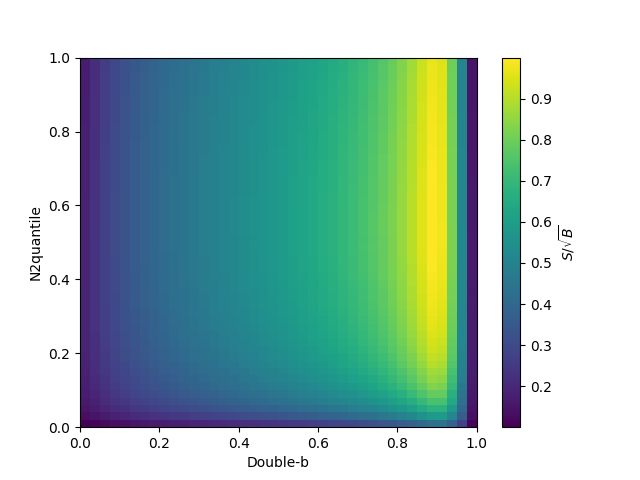

<Hist (N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7fc35a0a72e8>


In [51]:
htemp = z2.project("process")
htemp.clear()
htemp.label = '$S/\sqrt{B}$'
#htemp.label = 'Entries'
htemp._sumw = {():norm_soverb}
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", patch_opts={})
print(htemp)



In [80]:
fig.savefig("plots/Optimization_quantile_doublecsv_withfinern2_msdcut_noctr.pdf")
fig.savefig("plots/Optimization_quantile_doublecsv_withfinern2_msdcut_noctr.png")



In [77]:
a = htemp.values()[()]
quantiles = np.quantile(a, [0.98,0.999])
xx, yy = np.meshgrid(*tuple(ax.centers() for ax in htemp.axes()))
cc = ax.contour(yy, xx, a.T, quantiles, colors='w')
ax.clabel(cc, inline=1, fontsize=10)

<a list of 1 text.Text objects>

In [78]:
from matplotlib.patches import Ellipse
a = htemp.values()[()]
(q_ind, csv_ind) = np.unravel_index(np.argmax(a, axis=None), a.shape)
doublecsvbin = htemp.identifiers("AK8Puppijet0_doublecsv")
quantilebin = htemp.identifiers("N2quantile")
#print(doublecsvbin)
print(doublecsvbin[csv_ind].lo)
print(quantilebin[q_ind].lo)

xmax = doublecsvbin[csv_ind].lo
ymax = quantilebin[q_ind].lo
#ax.annotate('max', xy=(xmax, ymax), xytext=(xmax, ymax),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
ax.annotate('%.2f,%.2f' %(xmax,ymax),
            xy=(xmax, ymax), xycoords='data',
            xytext=(-100, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))


0.875
0.32


Text(-100,30,'0.88,0.32')

In [79]:
cclabels = ax.clabel(cc, inline=1, fontsize=10, fmt='%.2f')

import matplotlib.patheffects as patheffects
plt.setp(cc.collections, path_effects=[patheffects.withStroke(linewidth=3, foreground='k')])
plt.setp(cclabels, path_effects=[patheffects.withStroke(linewidth=1.5, foreground='k')])

[None, None, None, None]

In [ ]:
tuples = tuples[::-1]

In [ ]:
print(tuples)

<IPython.core.display.Javascript object>


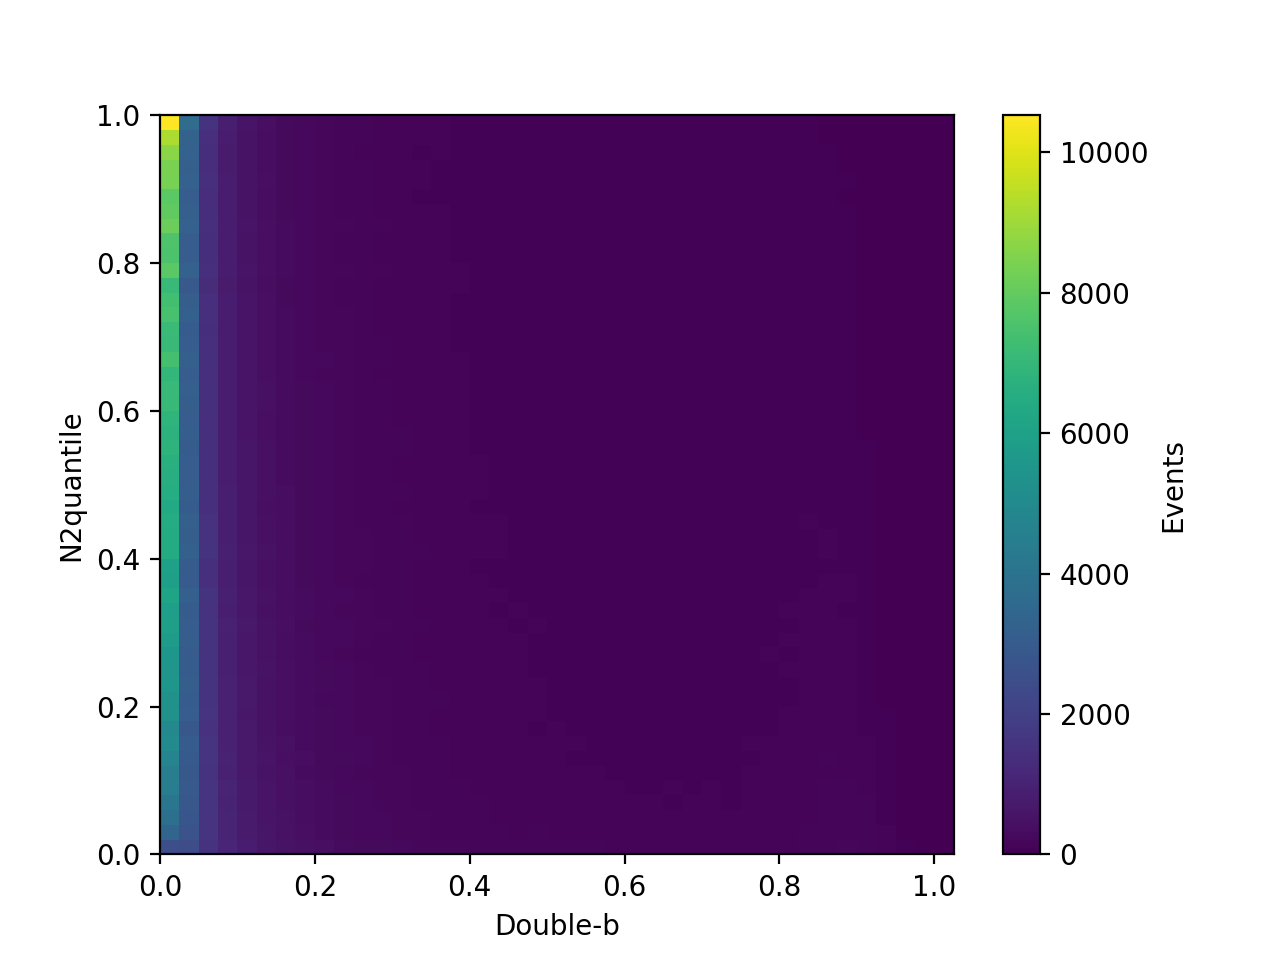

In [34]:
htemp2 = z.project("process")
fig2, ax2, _ = plot.plot2d(htemp2, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [38]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [43]:
print(a[2][0])
print(a)

10
[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [45]:
b = multidim_cumsum(a)

In [46]:
print(b)

[[ 9  2  3]
 [12  4  7]
 [28 10 12]]


In [ ]:
tt = z.project("process").values(overflow='allnan')


In [ ]:
print(tt)

In [ ]:
print(hists)

In [ ]:
print(y)

In [33]:
fig2, ax, _ = plot.plot2d(y2.sum("jetrho").sum("process"), xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

KeyError: 'No axis jetrho found in <Hist (process,AK8Puppijet0_msd,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f076fc02a58>'

In [ ]:
fig2.savefig("plots/HBB_quantiledoubleb.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig3, ax, _ = plot.plot1d(y2.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig3.savefig("plots/QCD_quantile.pdf")


In [ ]:
fig4, ax, _ = plot.plot2d(y.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig4.savefig("plots/QCD_N2_jetrho.pdf")


In [ ]:
fig5, ax, _ = plot.plot2d(x.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
fig5.savefig("plots/QCD_N2_jetpt.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig6, ax, _ = plot.plot1d(y.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig7, ax, _ = plot.plot2d(y2.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig5, ax, _ = plot.plot2d(x2.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
multidim_cumsum(a)